<a href="https://colab.research.google.com/github/andrea12edoardo/sport-image-classification/blob/main/sport_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install d2l==1.0.0a1.post0

# Based on Giant Shoulders

**Authors:** Alberto Venturini, Andrea Sciortino


This project investigates the performance of image classification neural networks leveraging pre-trained models. The primary focus is to evaluate the efficiency and accuracy of various architectures in recognizing and categorizing sports images. Here, we aim to perform a comparative analysis between a neural network developed from scratch and pre-trained models under diverse conditions, assessing key metrics such as accuracy and computational complexity.


## Data Loading

The '*100 Sports Classification*' dataset, available on [Kaggle](https://www.kaggle.com/datasets/gpiosenka/sports-classification/data), is famouse dataset with over 100,000 images, each sized at `224×224` pixels. This dataset spans 100 distinct sports categories of color images. Its structured organization ensures a balanced distribution across training, validation, and test sets, enabling efficient and systematic model development.

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP file
print("Upload the DATASET.zip file:")
uploaded = files.upload()

# Step 2: Extract the ZIP file
zip_filename = list(uploaded.keys())[0]  # Get the uploaded ZIP filename
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('DATASET')  # Extract to a directory named 'DATASET'

# Step 3: Verify the extracted contents
print("Contents of the DATASET directory:")
print(os.listdir('DATASET'))


Upload the DATASET.zip file:


Saving DATASET.zip to DATASET (1).zip
Contents of the DATASET directory:
['__MACOSX', 'DATASET']


In [ ]:
# Step 3: Define paths for TRAIN, VALID, TEST, and the CSV file
train_dir = 'DATASET/DATASET/TRAIN'
valid_dir = 'DATASET/DATASET/VALID'
test_dir = 'DATASET/DATASET/TEST'
csv_file = 'DATASET/DATASET/sports.csv'

# Step 4: Example usage - list contents of each directory
print("Contents of the TRAIN directory:", os.listdir(train_dir))
print("Contents of the VALID directory:", os.listdir(valid_dir))
print("Contents of the TEST directory:", os.listdir(test_dir))
print("CSV file path:", csv_file)

Contents of the TRAIN directory: ['rugby', 'hockey', 'nascar racing', 'football', '.DS_Store', 'basketball', 'olympic wrestling', 'formula 1 racing', 'baseball']
Contents of the VALID directory: ['rugby', 'hockey', 'nascar racing', 'football', '.DS_Store', 'basketball', 'olympic wrestling', 'formula 1 racing', 'baseball']
Contents of the TEST directory: ['rugby', 'hockey', 'nascar racing', 'football', '.DS_Store', 'basketball', 'olympic wrestling', 'formula 1 racing', 'baseball']
CSV file path: DATASET/DATASET/sports.csv


In [ ]:
import os

# Remove .DS_Store files directly from the dataset
for root, dirs, files in os.walk('DATASET'):
    for file in files:
        if file == ".DS_Store":
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Removed: {file_path}")

# Verify that .DS_Store is removed
print("Final contents of the TRAIN directory:", os.listdir('DATASET/DATASET/TRAIN'))
print("Final contents of the VALID directory:", os.listdir('DATASET/DATASET/VALID'))
print("Final contents of the TEST directory:", os.listdir('DATASET/DATASET/TEST'))


Removed: DATASET/DATASET/.DS_Store
Removed: DATASET/DATASET/TRAIN/.DS_Store
Removed: DATASET/DATASET/TEST/.DS_Store
Removed: DATASET/DATASET/VALID/.DS_Store
Final contents of the TRAIN directory: ['rugby', 'hockey', 'nascar racing', 'football', 'basketball', 'olympic wrestling', 'formula 1 racing', 'baseball']
Final contents of the VALID directory: ['rugby', 'hockey', 'nascar racing', 'football', 'basketball', 'olympic wrestling', 'formula 1 racing', 'baseball']
Final contents of the TEST directory: ['rugby', 'hockey', 'nascar racing', 'football', 'basketball', 'olympic wrestling', 'formula 1 racing', 'baseball']


In [ ]:
def get_dataloader_workers():
    """Use as many processes working in parallel to read the data as # CPU cores.
    Other recommended range: 2 to 4"""
    import os
    return os.cpu_count()


# Helper function to visualize a batch
def show_images_batch(sample_batched, class_names):
    """Show images and their labels for a batch."""
    images_batch, labels_batch = sample_batched
    batch_size = len(images_batch)
    grid = utils.make_grid(images_batch, nrow=8, padding=2)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))  # Convert CHW to HWC
    plt.title("Batch of Images")
    print("Labels:", [class_names[label] for label in labels_batch[:8]])  # Show first 8 labels
    plt.axis('off')
    plt.show()

# Data Loading and Augmentation Process

In this section, we outline the process of preparing image datasets for training, validation, and testing in a deep learning context.

This involves two phases:
- Data Augmentation and Transformations
- creation of DataLoaders

Data augmentation is a crucial technique used to artificially expand the size of the training dataset by applying various transformations to the images. This helps improve the model's ability to generalize by introducing variability in the training data.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision.datasets import ImageFolder
import torch
from d2l import torch as d2l


# Define data augmentation and transformations
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(10),     # Rotate by up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random crop with scaling
    transforms.ToTensor()  # Convert image to tensor
])

# Standard transformations for testing and validation
test_val_transforms = transforms.Compose([
    transforms.ToTensor()  # Convert image to tensor
])

#  Create datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
valid_dataset = ImageFolder(root=valid_dir, transform=test_val_transforms)
test_dataset = ImageFolder(root=test_dir, transform=test_val_transforms)

#  Create DataLoaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())

# Verify DataLoaders
print(f"Train loader contains {len(train_loader)} batches.")
print(f"Validation loader contains {len(valid_loader)} batches.")
print(f"Test loader contains {len(test_loader)} batches.")


Train loader contains 6 batches.
Validation loader contains 1 batches.
Test loader contains 1 batches.


Batch 0 - Image size: torch.Size([256, 3, 224, 224]), Labels size: torch.Size([256])
Labels: ['olympic wrestling', 'rugby', 'olympic wrestling', 'hockey', 'baseball', 'baseball', 'football', 'baseball']


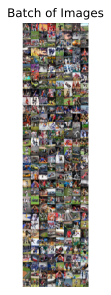

In [ ]:
# Step 9: Visualize one batch
class_names = train_dataset.classes  # Get class names
for i_batch, sample_batched in enumerate(train_loader):
     print(f"Batch {i_batch} - Image size: {sample_batched[0].size()}, Labels size: {sample_batched[1].size()}")

     if i_batch == 0:  # Visualize the first batch
         plt.figure()
         show_images_batch(sample_batched, class_names)
         break

# Training and Evaluation Function

The `train` function is a crucial component of our image classification project, responsible for training the neural network model using the provided training dataset. This function not only tracks the training process but also evaluates the model's performance on validation and test datasets at each epoch. By monitoring these metrics, we can assess how well the model is learning and generalizing to unseen data.

In order to effectively train our model, we need to configure the components of the function.
1. ***Number of Epochs***
2. ***Weight Initialization***
  - Xavier (Glorot)
3. **Optimization *testo in corsivo* Algorithm**
  -  Stochastic Gradient Descent (SGD): method that updates weights using a mini-batch of data
  - Adam: an advanced optimizer that adapts learning rates for each parameter based on first and second moment estimates of gradients.
4. ***Batch Size***
5. ***Learning Rate***: a hyperparameter that controls how much to change the model's weights with respect to the gradient during optimization.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

def evaluate_accuracy_and_loss_gpu(net, data_iter, loss_fn, device):
    """Evaluate accuracy and loss on the GPU"""
    net.eval()  # Set the network to evaluation mode
    metric = d2l.Accumulator(3)  # Sum of loss, sum of accuracy, no. of examples
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss_fn(y_hat, y)
            metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
    return metric[0] / metric[2], metric[1] / metric[2]  # Loss, Accuracy

def train(net, train_iter, val_iter, num_epochs, lr, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    """Train a model with a GPU, and track train and validation accuracy."""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)  # Xavier parameter initialization
    net.apply(init_weights)
    print('Training on', device)

    net.to(device)  # MOVE the net to the GPU (if available)
    #optimizer = torch.optim.SGD(net.parameters(), lr=lr)###trying with adam
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=lr) ###adapting to only the one that requires it !
    loss = nn.CrossEntropyLoss()

    # Metrics to track
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train()  # Set the network to training mode

        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)  # MOVE minibatch to the GPU (if available)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():  # Detach gradient calculation
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])

        # Record training metrics for this epoch
        train_l = metric[0] / metric[2]
        train_acc = metric[1] / metric[2]
        train_losses.append(train_l)
        train_accuracies.append(train_acc)

        # Evaluate on validation set
        val_loss, val_acc = evaluate_accuracy_and_loss_gpu(net, val_iter, loss, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Print only training and validation metrics (no test accuracy)
        print(f'Epoch {epoch + 1}: '
              f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
              f'val loss {val_loss:.3f}, val acc {val_acc:.3f}')

    return train_losses, train_accuracies, val_losses, val_accuracies


def plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs):
    """Plot training and validation metrics"""
    epochs = range(1, num_epochs + 1)

    # Plot Loss
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy (Remove Test Accuracy from the graph)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Model Definition

Finally, we can define and present two distinct models architectures.

> - Simple Net
> - DenseNet120

## Simple Net

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn

net = nn.Sequential(
    nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(), #96==> 30
    nn.MaxPool2d(kernel_size=3, stride=2),

    nn.Conv2d(96, 192, kernel_size=5, padding=2), nn.ReLU(), #96==> 30, 256=>96
    nn.MaxPool2d(kernel_size=3, stride=2),

    nn.Conv2d(192, 384, kernel_size=3, padding=1), nn.ReLU(), #reduce the 3 layers to 2
    nn.Conv2d(384, 600, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),

    nn.Linear(15000, 2400), nn.ReLU(),
    nn.Dropout(p=0.5),

    nn.Linear(2400, 8))

In [ ]:
X = torch.randn(1, 3, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 192, 26, 26])
ReLU Output shape:	 torch.Size([1, 192, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 192, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 600, 12, 12])
ReLU Output shape:	 torch.Size([1, 600, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 600, 5, 5])
Flatten Output shape:	 torch.Size([1, 15000])
Linear Output shape:	 torch.Size([1, 2400])
ReLU Output shape:	 torch.Size([1, 2400])
Dropout Output shape:	 torch.Size([1, 2400])
Linear Output shape:	 torch.Size([1, 8])


Training on cuda
Epoch 1: loss 2.080, train acc 0.125, val loss 2.079, val acc 0.125
Epoch 2: loss 2.079, train acc 0.130, val loss 2.078, val acc 0.125
Epoch 3: loss 2.081, train acc 0.123, val loss 2.077, val acc 0.125
Epoch 4: loss 2.078, train acc 0.124, val loss 2.075, val acc 0.125
Epoch 5: loss 2.074, train acc 0.144, val loss 2.074, val acc 0.125
Epoch 6: loss 2.076, train acc 0.144, val loss 2.073, val acc 0.125
Epoch 7: loss 2.074, train acc 0.133, val loss 2.073, val acc 0.125
Epoch 8: loss 2.076, train acc 0.131, val loss 2.071, val acc 0.175
Epoch 9: loss 2.072, train acc 0.145, val loss 2.070, val acc 0.200
Epoch 10: loss 2.072, train acc 0.156, val loss 2.070, val acc 0.225
Epoch 11: loss 2.069, train acc 0.140, val loss 2.069, val acc 0.200
Epoch 12: loss 2.070, train acc 0.153, val loss 2.068, val acc 0.225
Epoch 13: loss 2.070, train acc 0.148, val loss 2.067, val acc 0.225
Epoch 14: loss 2.070, train acc 0.161, val loss 2.067, val acc 0.275
Epoch 15: loss 2.068, trai

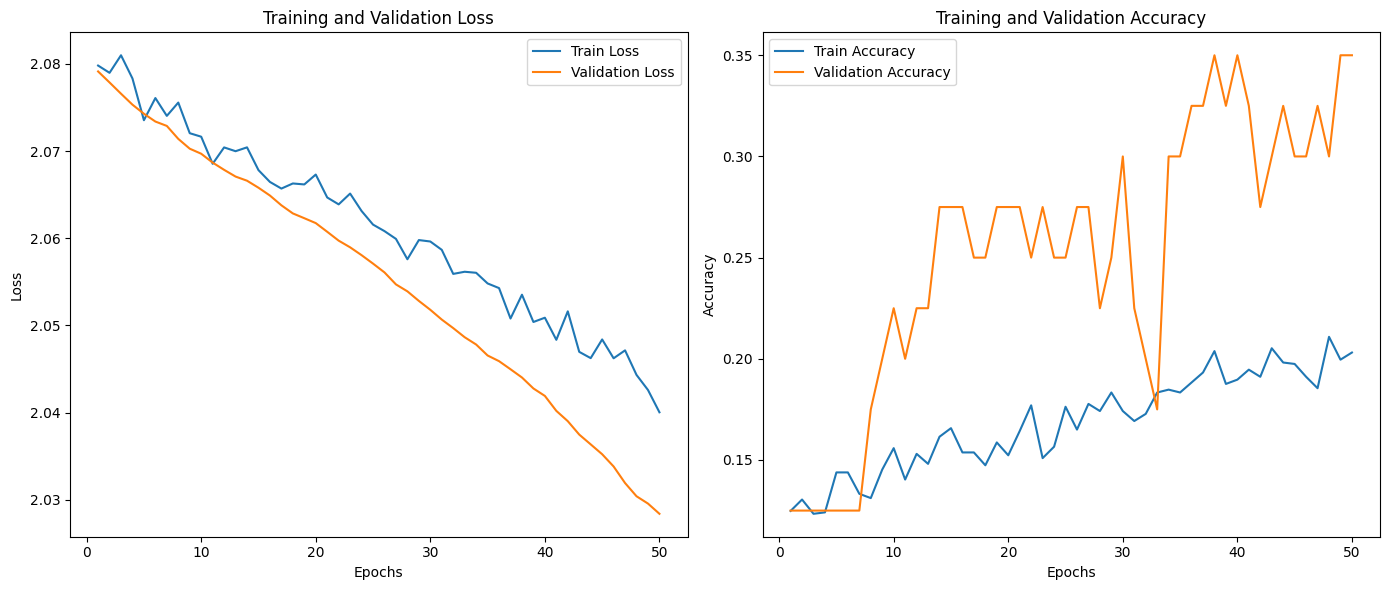

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.001, 50

train_losses, train_accuracies, val_losses, val_accuracies = train(net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- SDG

Training on cuda
Epoch 1: loss 2.080, train acc 0.138, val loss 2.080, val acc 0.125
Epoch 2: loss 2.074, train acc 0.136, val loss 2.074, val acc 0.125
Epoch 3: loss 2.073, train acc 0.152, val loss 2.071, val acc 0.175
Epoch 4: loss 2.069, train acc 0.144, val loss 2.068, val acc 0.225
Epoch 5: loss 2.065, train acc 0.183, val loss 2.065, val acc 0.275
Epoch 6: loss 2.065, train acc 0.168, val loss 2.061, val acc 0.175
Epoch 7: loss 2.061, train acc 0.176, val loss 2.056, val acc 0.225
Epoch 8: loss 2.058, train acc 0.176, val loss 2.053, val acc 0.200
Epoch 9: loss 2.057, train acc 0.173, val loss 2.051, val acc 0.200
Epoch 10: loss 2.054, train acc 0.193, val loss 2.048, val acc 0.275
Epoch 11: loss 2.048, train acc 0.213, val loss 2.042, val acc 0.275
Epoch 12: loss 2.042, train acc 0.231, val loss 2.033, val acc 0.225
Epoch 13: loss 2.038, train acc 0.200, val loss 2.027, val acc 0.250
Epoch 14: loss 2.032, train acc 0.212, val loss 2.023, val acc 0.250
Epoch 15: loss 2.027, trai

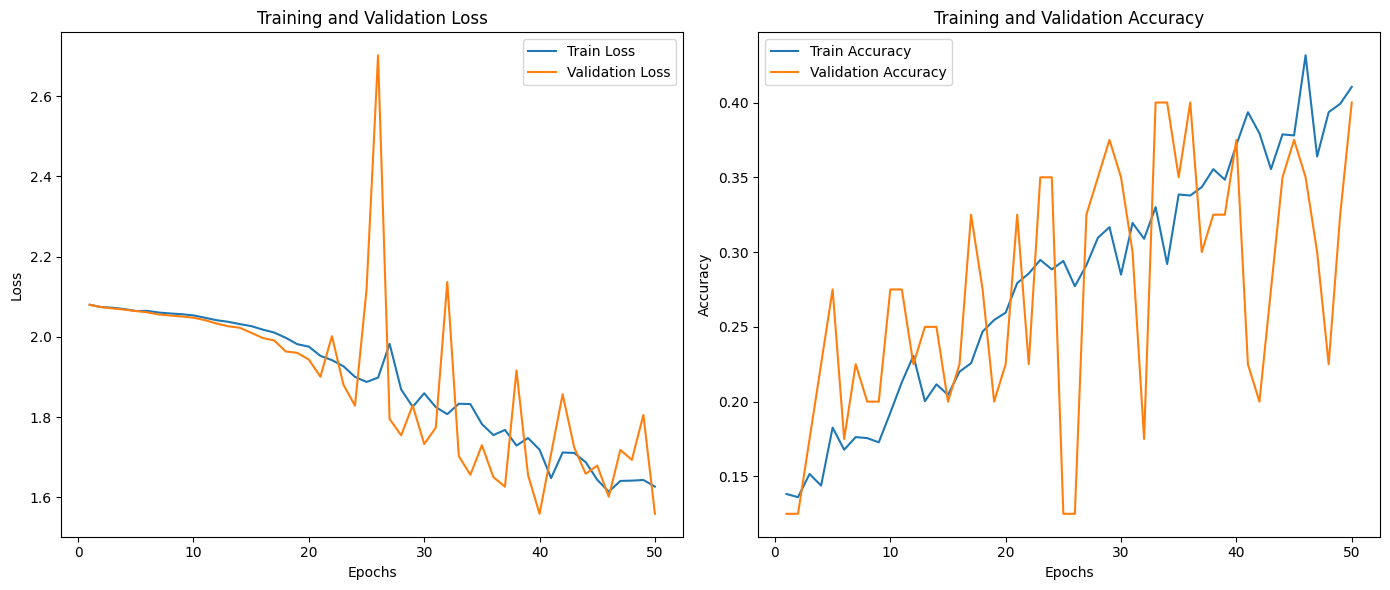

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.005, 50

train_losses, train_accuracies, val_losses, val_accuracies = train(net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- SDG

Let's use Adam optimizer:

Training on cuda
Epoch 1: loss 2.061, train acc 0.171, val loss 1.976, val acc 0.175
Epoch 2: loss 1.912, train acc 0.260, val loss 1.695, val acc 0.375
Epoch 3: loss 1.804, train acc 0.301, val loss 1.766, val acc 0.350
Epoch 4: loss 1.696, train acc 0.366, val loss 1.501, val acc 0.400
Epoch 5: loss 1.536, train acc 0.425, val loss 1.604, val acc 0.325
Epoch 6: loss 1.492, train acc 0.439, val loss 1.793, val acc 0.275
Epoch 7: loss 1.473, train acc 0.446, val loss 1.249, val acc 0.500
Epoch 8: loss 1.321, train acc 0.494, val loss 1.170, val acc 0.475
Epoch 9: loss 1.208, train acc 0.552, val loss 1.736, val acc 0.375
Epoch 10: loss 1.327, train acc 0.506, val loss 1.285, val acc 0.500
Epoch 11: loss 1.170, train acc 0.566, val loss 1.071, val acc 0.625
Epoch 12: loss 1.143, train acc 0.580, val loss 1.313, val acc 0.425
Epoch 13: loss 1.088, train acc 0.573, val loss 0.950, val acc 0.625
Epoch 14: loss 0.965, train acc 0.638, val loss 0.818, val acc 0.675
Epoch 15: loss 0.985, trai

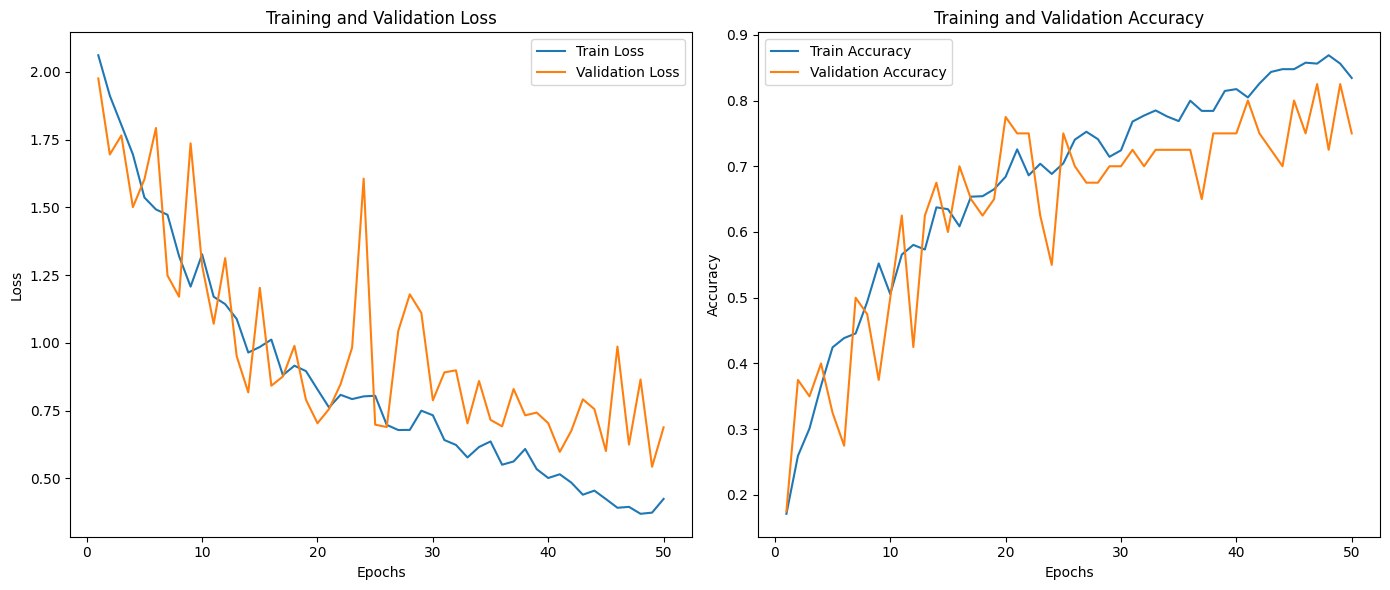

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.0001, 50

train_losses, train_accuracies, val_losses, val_accuracies = train(net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- Adam

Training on cuda
Epoch 1: loss 2.052, train acc 0.175, val loss 1.940, val acc 0.250
Epoch 2: loss 1.908, train acc 0.276, val loss 1.657, val acc 0.325
Epoch 3: loss 1.760, train acc 0.322, val loss 1.573, val acc 0.375
Epoch 4: loss 1.632, train acc 0.379, val loss 1.400, val acc 0.550
Epoch 5: loss 1.526, train acc 0.425, val loss 1.259, val acc 0.500
Epoch 6: loss 1.407, train acc 0.479, val loss 1.226, val acc 0.500
Epoch 7: loss 1.300, train acc 0.507, val loss 1.237, val acc 0.550
Epoch 8: loss 1.380, train acc 0.489, val loss 1.303, val acc 0.450
Epoch 9: loss 1.227, train acc 0.542, val loss 1.448, val acc 0.375
Epoch 10: loss 1.220, train acc 0.536, val loss 1.236, val acc 0.525
Epoch 11: loss 1.096, train acc 0.587, val loss 1.174, val acc 0.550
Epoch 12: loss 1.043, train acc 0.598, val loss 0.888, val acc 0.700
Epoch 13: loss 0.970, train acc 0.641, val loss 0.875, val acc 0.625
Epoch 14: loss 0.941, train acc 0.635, val loss 1.866, val acc 0.475
Epoch 15: loss 1.007, trai

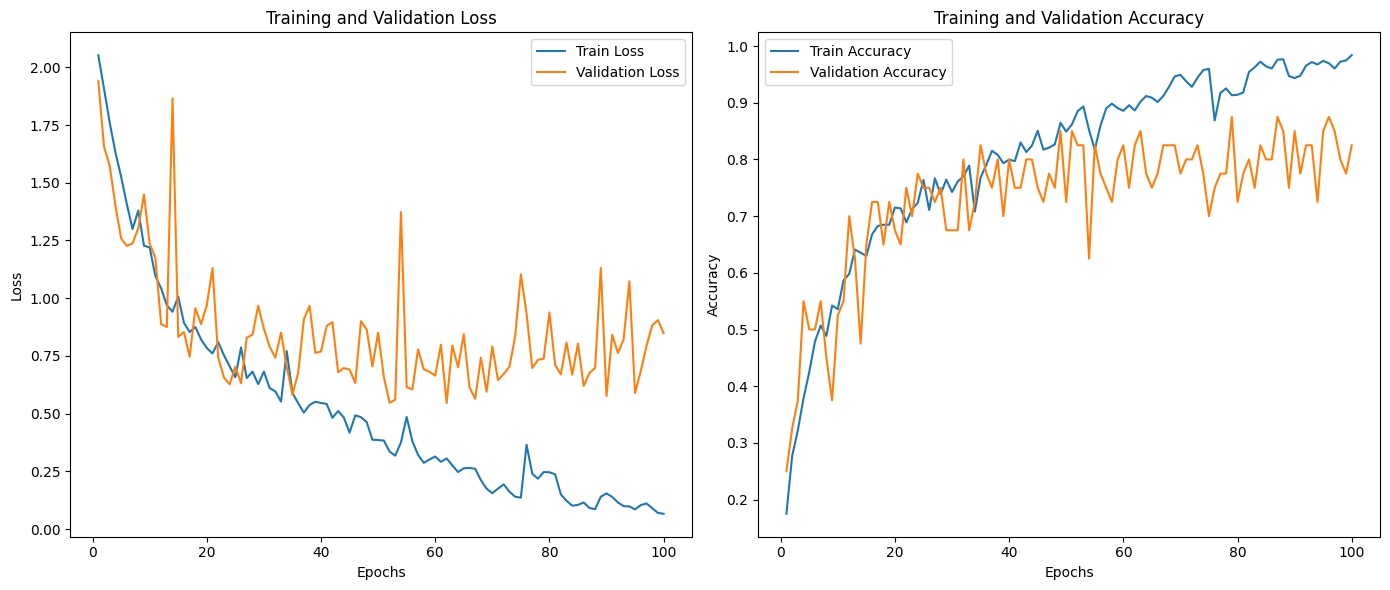

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.0001, 100

train_losses, train_accuracies, val_losses, val_accuracies = train(net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- Adam

With some trend of overfitting

# DenseNet121

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

base_model = models.densenet121(pretrained=True)


for param in base_model.parameters():
    param.requires_grad = False


all_conv_layers = list(base_model.features.children())
num_trainable_layers = 10


#for layer in all_conv_layers[-num_trainable_layers:]:
    #for param in layer.parameters():
        #param.requires_grad = True


num_classes = 8

base_model.classifier = nn.Sequential(
    nn.Linear(base_model.classifier.in_features, 512),
    nn.ReLU(),
    nn.Linear(512, num_classes)
)

dense_net = base_model



Training on cuda
Epoch 1: loss 2.299, train acc 0.139, val loss 50.830, val acc 0.050
Epoch 2: loss 2.166, train acc 0.157, val loss 2.087, val acc 0.125
Epoch 3: loss 2.098, train acc 0.173, val loss 2.081, val acc 0.125
Epoch 4: loss 2.069, train acc 0.176, val loss 2.077, val acc 0.125
Epoch 5: loss 2.062, train acc 0.168, val loss 2.081, val acc 0.125
Epoch 6: loss 2.052, train acc 0.170, val loss 2.059, val acc 0.175
Epoch 7: loss 2.047, train acc 0.181, val loss 2.015, val acc 0.150
Epoch 8: loss 2.040, train acc 0.166, val loss 2.027, val acc 0.125
Epoch 9: loss 2.041, train acc 0.163, val loss 2.031, val acc 0.125
Epoch 10: loss 2.029, train acc 0.176, val loss 2.000, val acc 0.200
Epoch 11: loss 2.023, train acc 0.181, val loss 1.992, val acc 0.250
Epoch 12: loss 2.020, train acc 0.171, val loss 2.006, val acc 0.250
Epoch 13: loss 2.018, train acc 0.181, val loss 1.963, val acc 0.250
Epoch 14: loss 2.015, train acc 0.168, val loss 1.982, val acc 0.250
Epoch 15: loss 2.014, tra

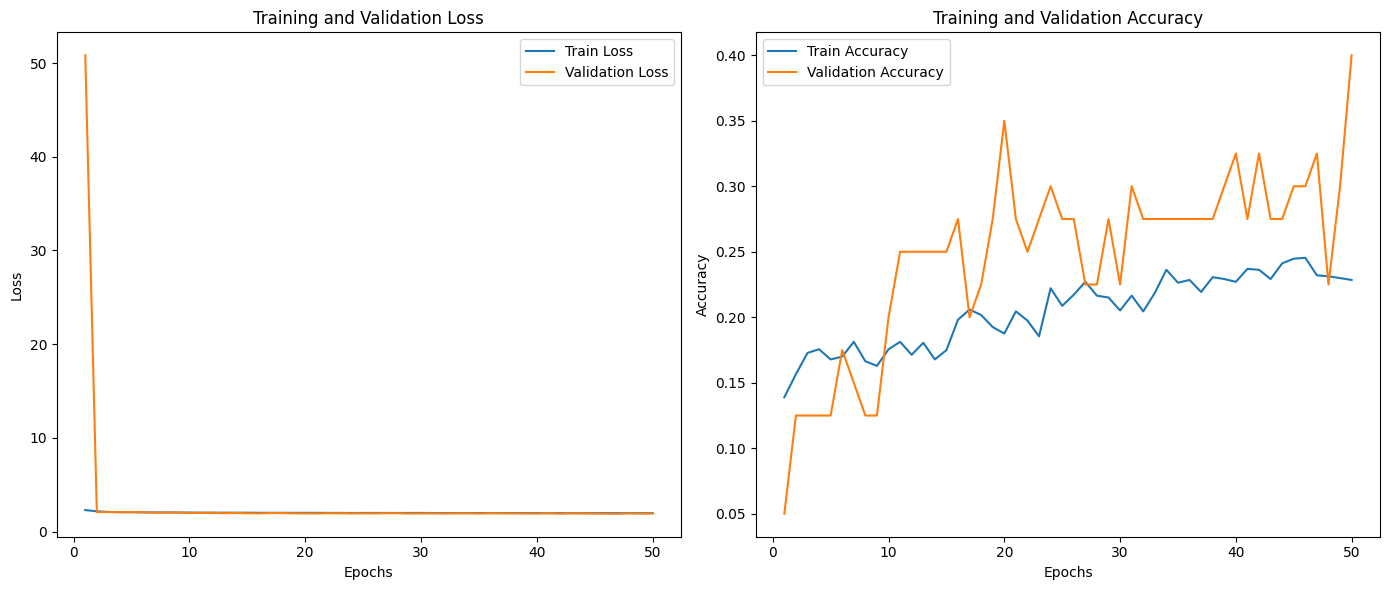

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.001, 50

train_losses, train_accuracies, val_losses, val_accuracies = train(dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- SDG
- all layer frozen

Kinda bad results lets lower batch size

Training on cuda
Epoch 1: loss 2.138, train acc 0.138, val loss 2.794, val acc 0.175
Epoch 2: loss 2.058, train acc 0.150, val loss 2.105, val acc 0.250
Epoch 3: loss 2.043, train acc 0.145, val loss 2.053, val acc 0.200
Epoch 4: loss 2.035, train acc 0.179, val loss 2.062, val acc 0.200
Epoch 5: loss 2.031, train acc 0.181, val loss 2.061, val acc 0.200
Epoch 6: loss 2.023, train acc 0.185, val loss 2.027, val acc 0.275
Epoch 7: loss 2.021, train acc 0.196, val loss 2.035, val acc 0.275
Epoch 8: loss 2.007, train acc 0.204, val loss 2.016, val acc 0.275
Epoch 9: loss 2.002, train acc 0.195, val loss 2.014, val acc 0.200
Epoch 10: loss 2.004, train acc 0.189, val loss 2.035, val acc 0.250
Epoch 11: loss 2.002, train acc 0.198, val loss 2.010, val acc 0.300
Epoch 12: loss 1.997, train acc 0.201, val loss 1.985, val acc 0.250
Epoch 13: loss 1.989, train acc 0.192, val loss 2.013, val acc 0.250
Epoch 14: loss 1.992, train acc 0.198, val loss 2.011, val acc 0.250
Epoch 15: loss 1.985, trai

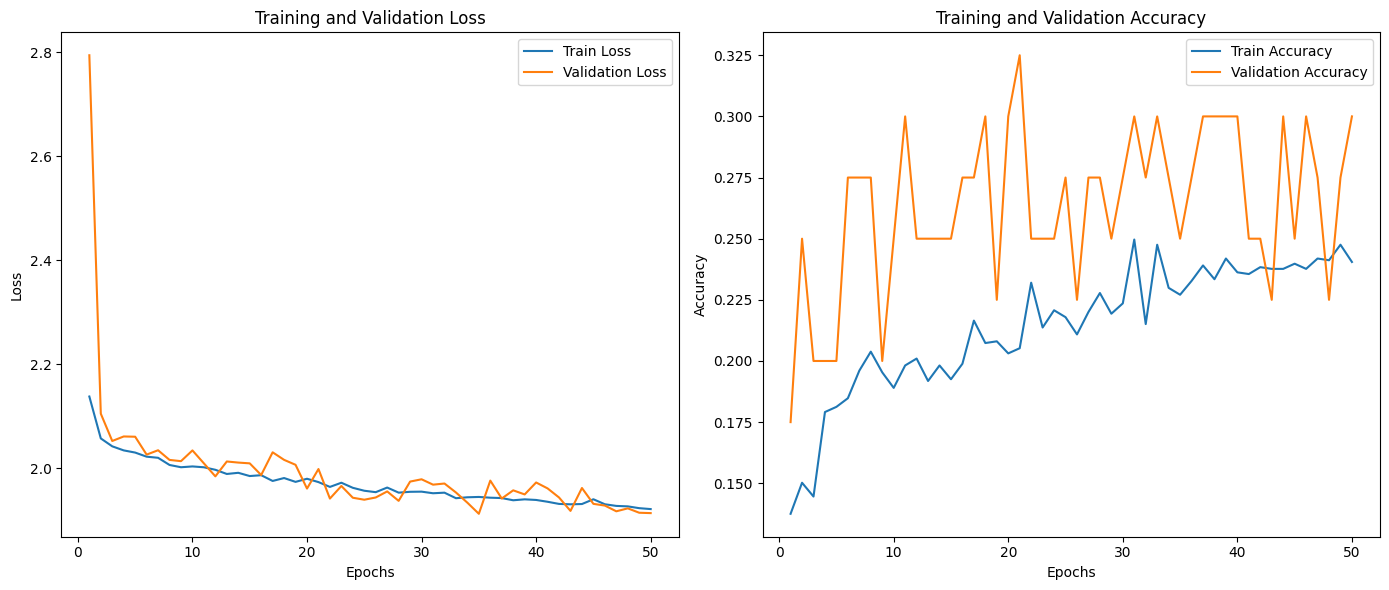

In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.001, 50

train_losses, train_accuracies, val_losses, val_accuracies = train(dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- SDG


Training on cuda
Epoch 1: loss 2.315, train acc 0.147, val loss 47.025, val acc 0.125
Epoch 2: loss 2.108, train acc 0.200, val loss 2.553, val acc 0.175
Epoch 3: loss 1.973, train acc 0.223, val loss 2.000, val acc 0.250
Epoch 4: loss 1.931, train acc 0.209, val loss 2.143, val acc 0.275
Epoch 5: loss 1.983, train acc 0.217, val loss 2.208, val acc 0.175
Epoch 6: loss 1.931, train acc 0.238, val loss 2.069, val acc 0.225
Epoch 7: loss 1.962, train acc 0.237, val loss 1.922, val acc 0.300
Epoch 8: loss 1.904, train acc 0.243, val loss 2.084, val acc 0.300
Epoch 9: loss 1.903, train acc 0.295, val loss 1.841, val acc 0.375
Epoch 10: loss 1.886, train acc 0.245, val loss 2.305, val acc 0.275
Epoch 11: loss 1.861, train acc 0.271, val loss 1.974, val acc 0.275
Epoch 12: loss 1.837, train acc 0.269, val loss 1.858, val acc 0.375
Epoch 13: loss 1.831, train acc 0.279, val loss 1.910, val acc 0.300
Epoch 14: loss 1.853, train acc 0.274, val loss 1.907, val acc 0.275
Epoch 15: loss 1.825, tra

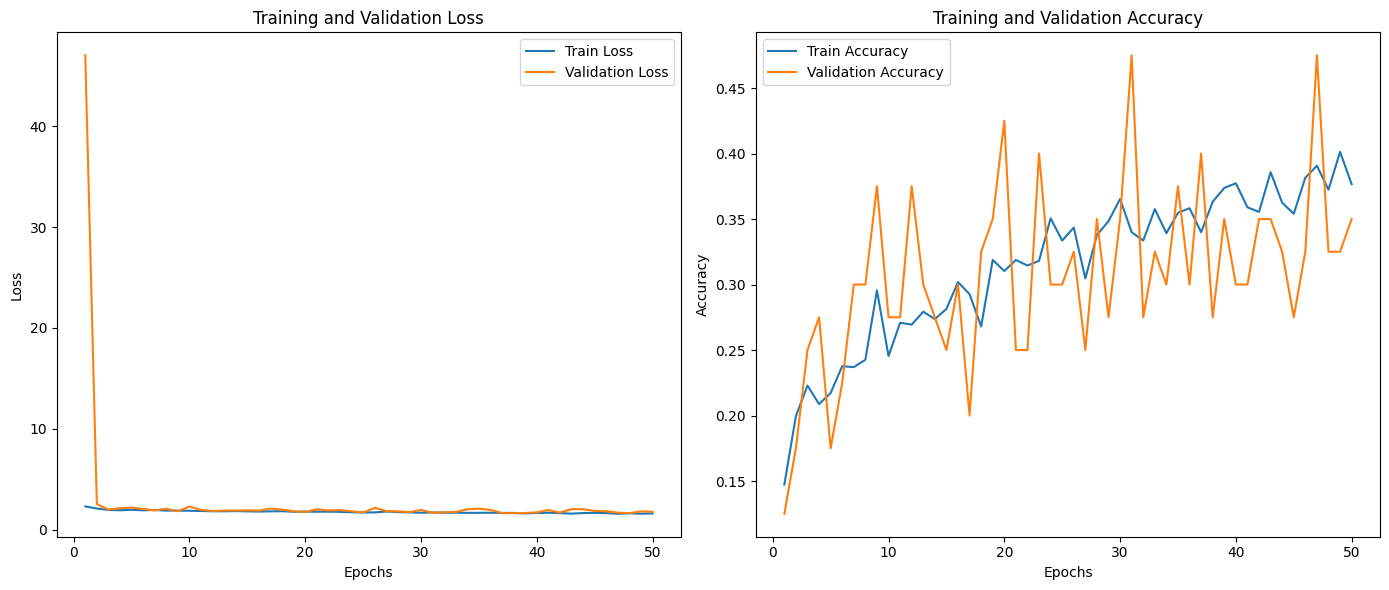

In [ ]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())



lr, num_epochs = 0.001, 50

train_losses, train_accuracies, val_losses, val_accuracies = train(dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- Adam

little bit better result lets defrezze the last  10 layers and. go back to sgd

In [ ]:
base_model = models.densenet121(pretrained=True)

for param in base_model.parameters():
    param.requires_grad = False

all_conv_layers = list(base_model.features.children())
num_trainable_layers = 10


for layer in all_conv_layers[-num_trainable_layers:]:
    for param in layer.parameters():
        param.requires_grad = True


num_classes = 8
base_model.classifier = nn.Sequential(
    nn.Linear(base_model.classifier.in_features, 512),
    nn.ReLU(),
    nn.Linear(512, num_classes)
)
Z_dense_net = base_model

Training on cuda
Epoch 1: loss 2.446, train acc 0.122, val loss 13.437, val acc 0.150
Epoch 2: loss 2.422, train acc 0.115, val loss 2.207, val acc 0.125
Epoch 3: loss 2.369, train acc 0.118, val loss 2.202, val acc 0.125
Epoch 4: loss 2.349, train acc 0.121, val loss 2.184, val acc 0.125
Epoch 5: loss 2.318, train acc 0.130, val loss 2.151, val acc 0.125
Epoch 6: loss 2.290, train acc 0.131, val loss 2.166, val acc 0.075
Epoch 7: loss 2.256, train acc 0.128, val loss 2.292, val acc 0.100
Epoch 8: loss 2.241, train acc 0.125, val loss 2.477, val acc 0.075
Epoch 9: loss 2.212, train acc 0.136, val loss 2.504, val acc 0.050
Epoch 10: loss 2.209, train acc 0.136, val loss 2.487, val acc 0.050
Epoch 11: loss 2.186, train acc 0.145, val loss 2.439, val acc 0.100
Epoch 12: loss 2.165, train acc 0.157, val loss 2.408, val acc 0.125
Epoch 13: loss 2.159, train acc 0.157, val loss 2.436, val acc 0.100
Epoch 14: loss 2.141, train acc 0.177, val loss 2.319, val acc 0.150
Epoch 15: loss 2.130, tra

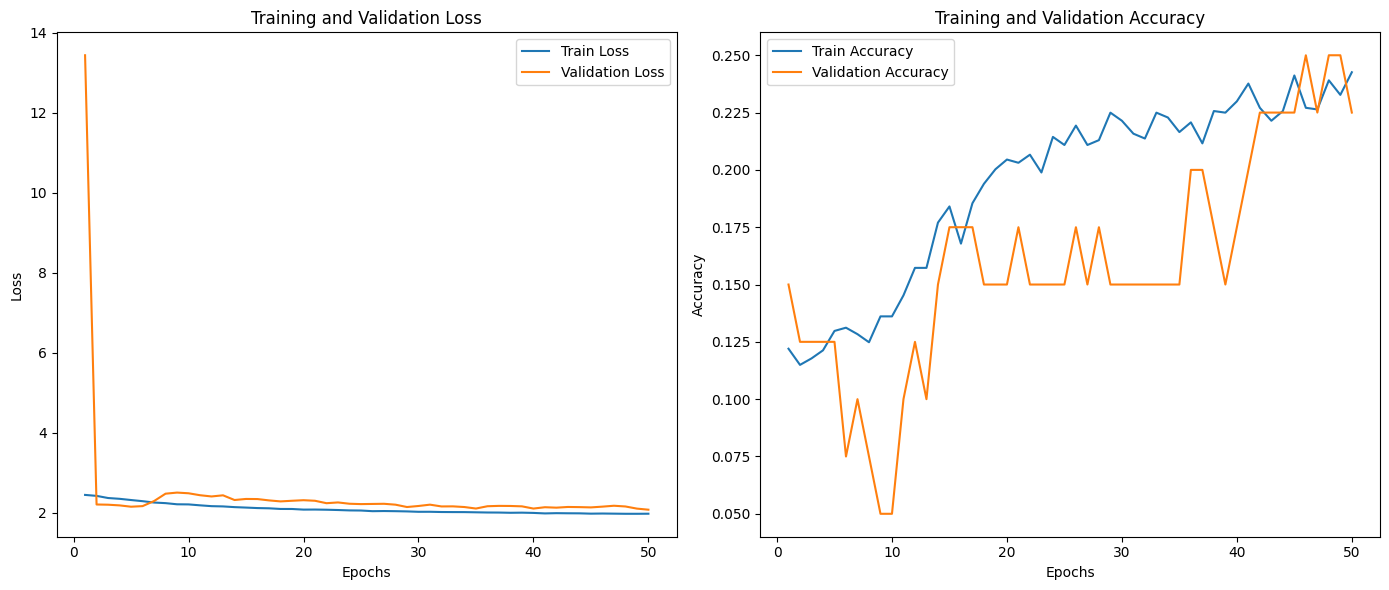

In [ ]:
batch_size = 128
lr, num_epochs = 0.0001, 50


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())


train_losses, train_accuracies, val_losses, val_accuracies, = train(Z_dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- SDG
- unfroze last 10

lets lower batch size and turn up

Training on cuda
Epoch 1: loss 2.122, train acc 0.127, val loss 3.287, val acc 0.100
Epoch 2: loss 2.093, train acc 0.130, val loss 2.226, val acc 0.075
Epoch 3: loss 2.056, train acc 0.159, val loss 2.204, val acc 0.075
Epoch 4: loss 2.050, train acc 0.179, val loss 2.106, val acc 0.150
Epoch 5: loss 2.043, train acc 0.181, val loss 2.053, val acc 0.150
Epoch 6: loss 2.027, train acc 0.205, val loss 2.040, val acc 0.125
Epoch 7: loss 2.017, train acc 0.216, val loss 1.984, val acc 0.150
Epoch 8: loss 1.998, train acc 0.243, val loss 1.946, val acc 0.225
Epoch 9: loss 1.987, train acc 0.229, val loss 1.942, val acc 0.275
Epoch 10: loss 1.995, train acc 0.234, val loss 1.910, val acc 0.275
Epoch 11: loss 1.979, train acc 0.246, val loss 1.933, val acc 0.250
Epoch 12: loss 1.968, train acc 0.256, val loss 1.911, val acc 0.225
Epoch 13: loss 1.957, train acc 0.248, val loss 1.920, val acc 0.225
Epoch 14: loss 1.948, train acc 0.255, val loss 1.889, val acc 0.225
Epoch 15: loss 1.935, trai

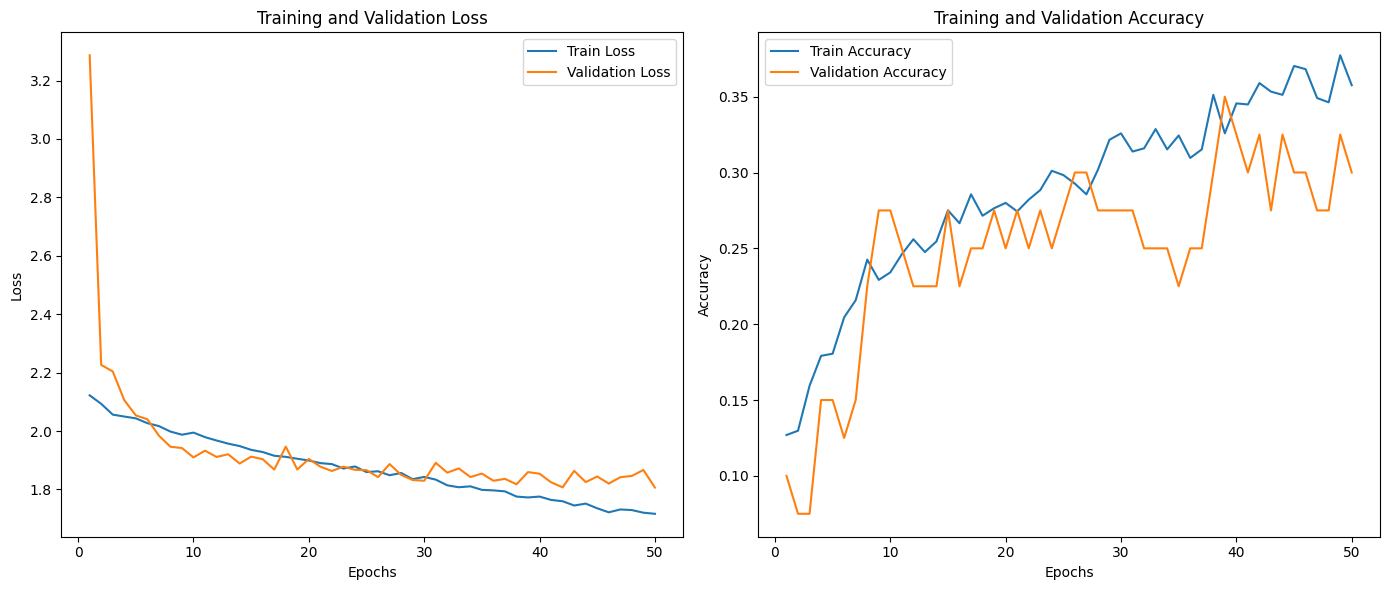

In [ ]:
batch_size = 64
lr, num_epochs = 0.0005, 50


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())


train_losses, train_accuracies, val_losses, val_accuracies, = train(Z_dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- SDG

a bit better but still lets try. adam now

Training on cuda
Epoch 1: loss 1.953, train acc 0.229, val loss 2.761, val acc 0.225
Epoch 2: loss 1.724, train acc 0.346, val loss 1.820, val acc 0.300
Epoch 3: loss 1.548, train acc 0.449, val loss 1.544, val acc 0.525
Epoch 4: loss 1.378, train acc 0.496, val loss 1.432, val acc 0.575
Epoch 5: loss 1.219, train acc 0.563, val loss 1.195, val acc 0.600
Epoch 6: loss 1.059, train acc 0.602, val loss 1.094, val acc 0.625
Epoch 7: loss 0.934, train acc 0.661, val loss 0.913, val acc 0.675
Epoch 8: loss 0.860, train acc 0.698, val loss 0.861, val acc 0.700
Epoch 9: loss 0.793, train acc 0.715, val loss 1.302, val acc 0.525
Epoch 10: loss 0.721, train acc 0.739, val loss 0.720, val acc 0.725
Epoch 11: loss 0.643, train acc 0.772, val loss 0.709, val acc 0.775
Epoch 12: loss 0.610, train acc 0.792, val loss 0.542, val acc 0.825
Epoch 13: loss 0.549, train acc 0.808, val loss 0.797, val acc 0.700
Epoch 14: loss 0.484, train acc 0.834, val loss 0.710, val acc 0.675
Epoch 15: loss 0.476, trai

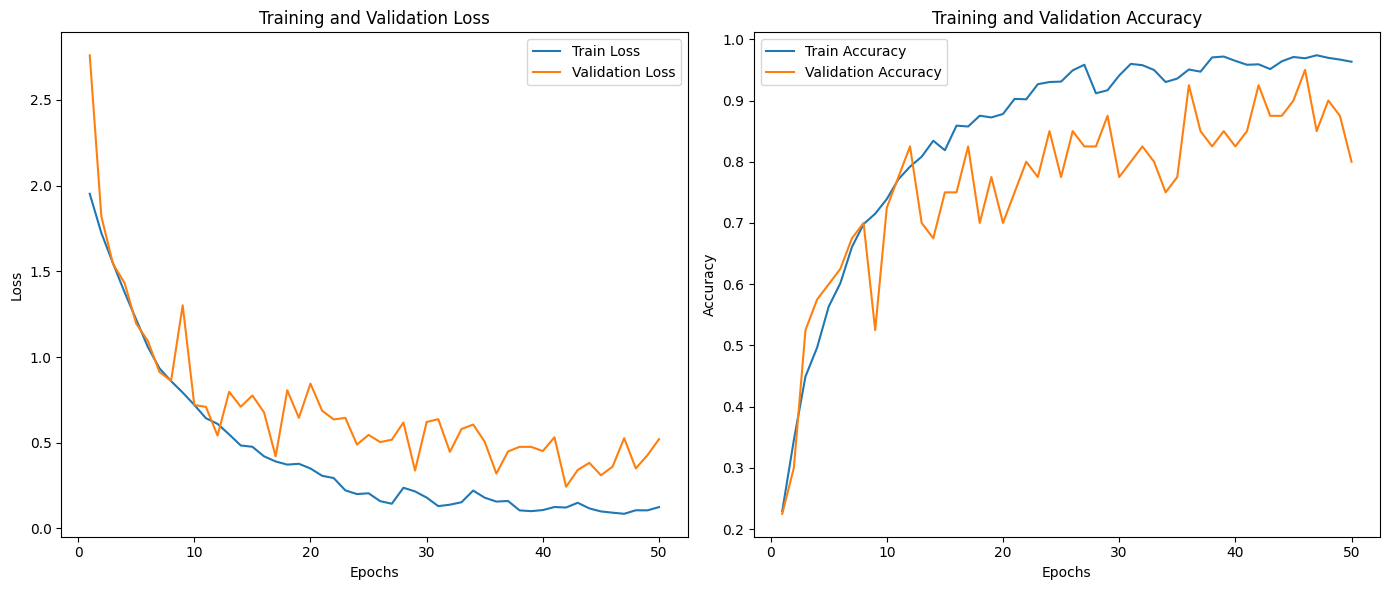

In [ ]:
batch_size = 64
lr, num_epochs = 0.0001, 50


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())


train_losses, train_accuracies, val_losses, val_accuracies, = train(Z_dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- Adam

Let's raise batch size, we got already goood results

Training on cuda
Epoch 1: loss 2.010, train acc 0.217, val loss 28.269, val acc 0.100
Epoch 2: loss 1.822, train acc 0.283, val loss 1.838, val acc 0.350
Epoch 3: loss 1.718, train acc 0.365, val loss 1.843, val acc 0.375
Epoch 4: loss 1.610, train acc 0.423, val loss 1.685, val acc 0.400
Epoch 5: loss 1.480, train acc 0.466, val loss 1.422, val acc 0.575
Epoch 6: loss 1.352, train acc 0.513, val loss 1.288, val acc 0.550
Epoch 7: loss 1.219, train acc 0.547, val loss 1.226, val acc 0.525
Epoch 8: loss 1.128, train acc 0.602, val loss 1.210, val acc 0.525
Epoch 9: loss 1.038, train acc 0.582, val loss 0.999, val acc 0.600
Epoch 10: loss 0.978, train acc 0.635, val loss 0.889, val acc 0.725
Epoch 11: loss 0.906, train acc 0.665, val loss 0.924, val acc 0.675
Epoch 12: loss 0.839, train acc 0.693, val loss 0.827, val acc 0.775
Epoch 13: loss 0.782, train acc 0.719, val loss 0.810, val acc 0.725
Epoch 14: loss 0.729, train acc 0.733, val loss 0.825, val acc 0.700
Epoch 15: loss 0.663, tra

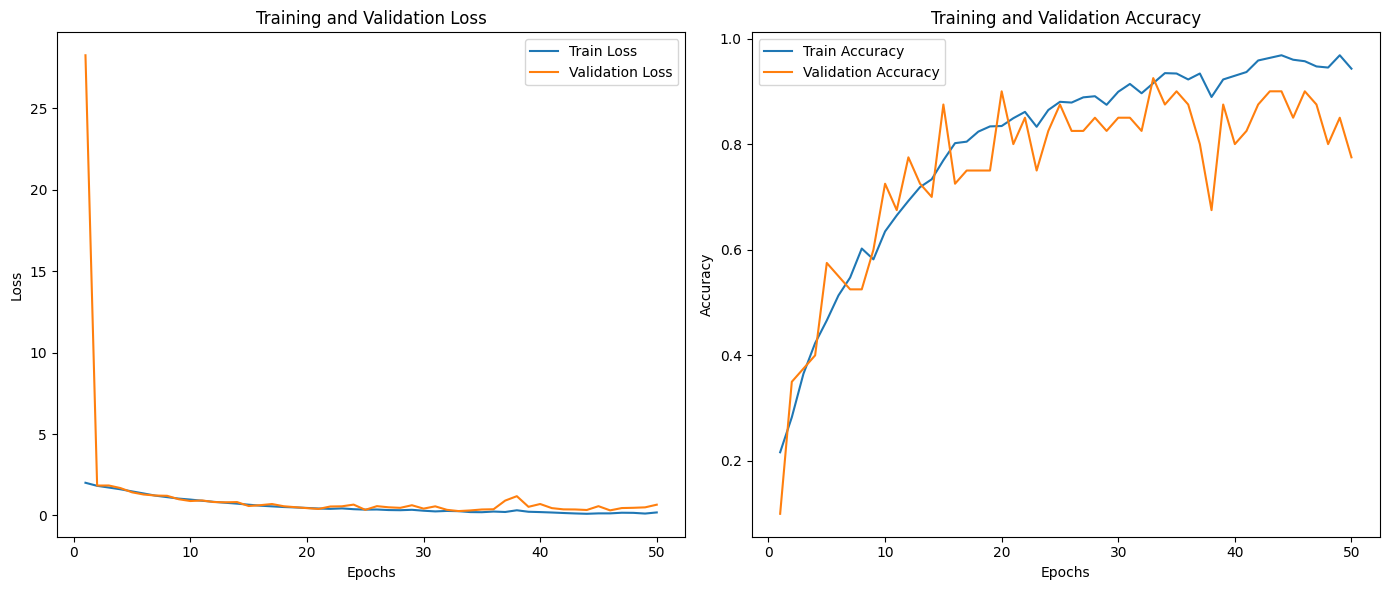

In [ ]:
batch_size = 128
lr, num_epochs = 0.0001, 50


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=get_dataloader_workers())
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=get_dataloader_workers())


train_losses, train_accuracies, val_losses, val_accuracies, = train(Z_dense_net, train_loader, valid_loader, num_epochs, lr)

plot_training_curves(train_losses, train_accuracies, val_losses, val_accuracies, num_epochs)

- Adam